In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Copy of devnagari digit.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/AI and ML")

In [17]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

In [8]:
# Task 1: Data Preparation

def load_images_from_folder(folder, img_size=(28, 28)):
    images, labels = [], []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize(img_size)  # Resize to 28x28
            img = np.array(img) / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Define dataset paths (Update paths accordingly)
train_dir = "/content/drive/MyDrive/AI and ML/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/AI and ML/DevanagariHandwrittenDigitDataset/Test"

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape for Keras input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")


Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


In [18]:
# Task 2: Build the FCN Model

model = Sequential([
    Input(shape=(28, 28, 1)),  # Define input shape properly
    Flatten(),
    Dense(64, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model.summary()  # To check the model architecture

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Task 3: Compile the Model

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Task 4: Train the Model

history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3149 - loss: 1.9158 - val_accuracy: 0.0000e+00 - val_loss: 7.8146
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8262 - loss: 0.5900 - val_accuracy: 0.0000e+00 - val_loss: 9.0653
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9101 - loss: 0.3058 - val_accuracy: 0.0000e+00 - val_loss: 9.8108
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9438 - loss: 0.2007 - val_accuracy: 0.0000e+00 - val_loss: 10.0150
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9573 - loss: 0.1508 - val_accuracy: 0.0000e+00 - val_loss: 10.3825
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9684 - loss: 0.1179 - val_accuracy: 0.0000e+00 - val_loss: 10.3604
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9715 - loss: 0.0983 - val_accuracy: 0.0000e+00 - val_loss: 10.7067
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.977

In [12]:
# Task 5: Evaluate the Model

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.7823 - loss: 2.5479
Test accuracy: 0.7823


In [19]:
# Task 6: Save and Load the Model

model.save('devnagari_fcn_model.keras')

loaded_model = keras.models.load_model('devnagari_fcn_model.keras')

loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1910 - loss: 2.4582
Test Accuracy: 0.1000


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted label for first image: 0
True label for first image: 0


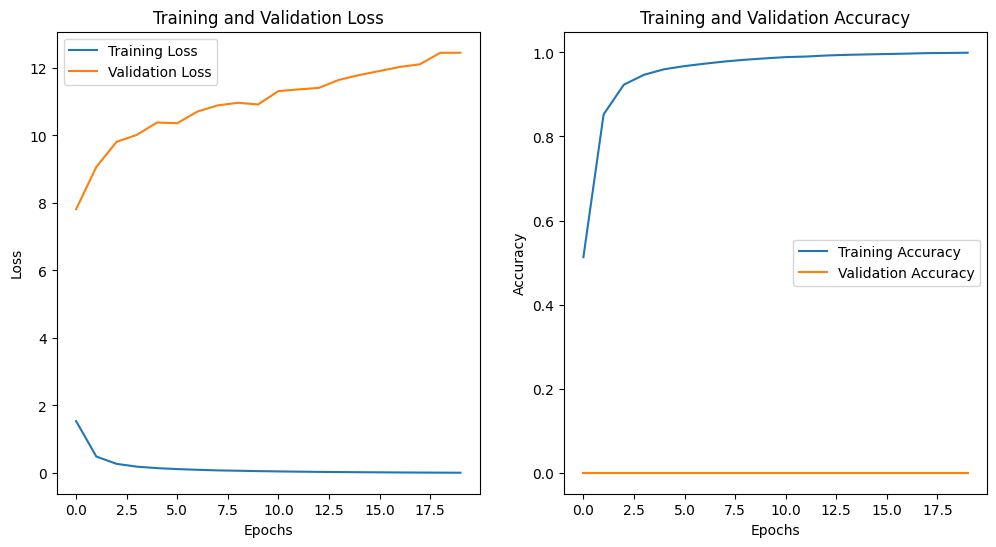

In [14]:
# Task 7: Predictions

predictions = loaded_model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

# Visualization of Training Progress

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()